<a href="https://colab.research.google.com/github/habibaezzat18/git-demo/blob/main/World_Happiness_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# New Section

In [17]:
df=pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
Standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
Logged GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0


 The dataset is clean — no missing values or duplicates were found.


In [24]:
drop_cols=['Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Ladder score in Dystopia', 'Explained by: Log GDP per capita','Explained by: Social support', 'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices', 'Explained by: Generosity','Explained by: Perceptions of corruption', 'Dystopia + residual' ]
df.drop(columns=drop_cols,inplace=True)

In [25]:
df.rename(columns={"Country name": "Country","Regional indicator": "Region","Ladder score": "Happiness","Logged GDP per capita": "GDP","Healthy life expectancy": "Life_Expectancy","Freedom to make life choices": "Freedom","Perceptions of corruption": "Corruption"},inplace=True)
df.describe()

,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [26]:
df.head(1)

,Country,Region,Happiness,GDP,Social support,Life_Expectancy,Freedom,Generosity,Corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186


🎯 The dataset is now cleaned and simplified. We are left with key variables only, which will help us focus on the relationships between:

Happiness
GDP, Social Support, Life Expectancy, Freedom, Generosity, Corruption
Country and Region

# Univariate Analysis

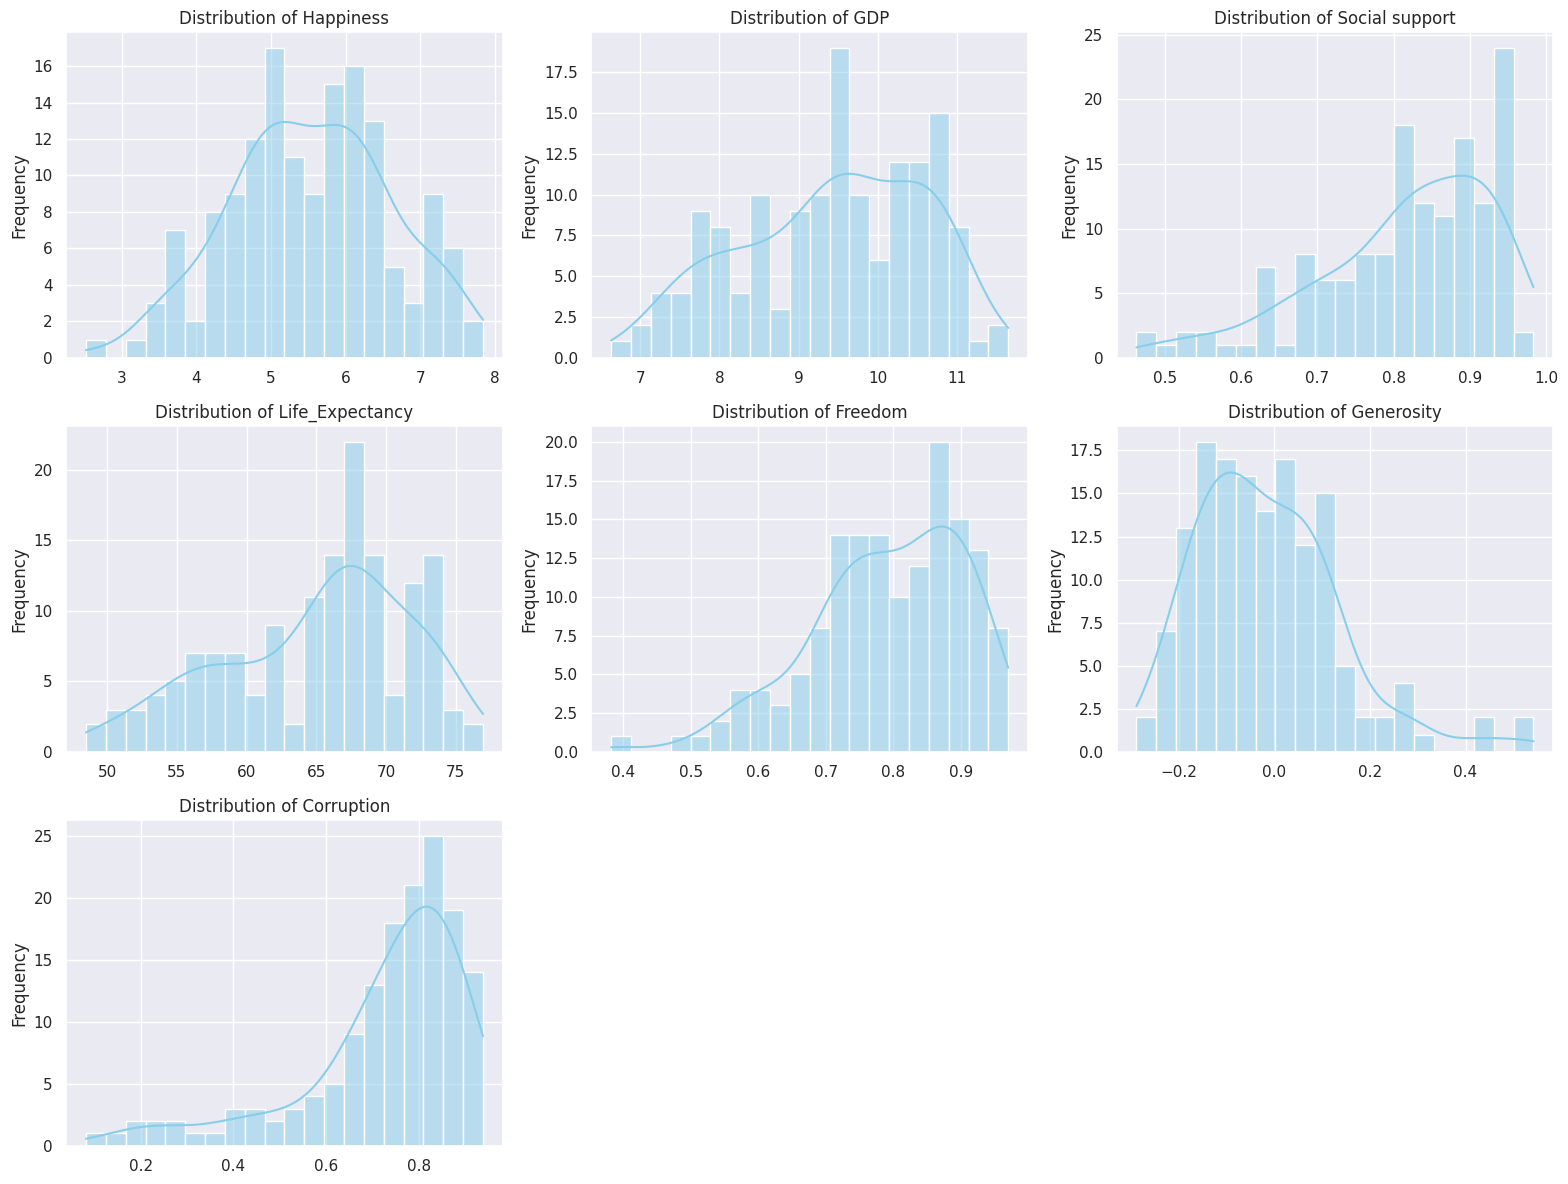

In [31]:
import math
numeric_cols = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy','Freedom', 'Generosity', 'Corruption']
num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color='skyblue', bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


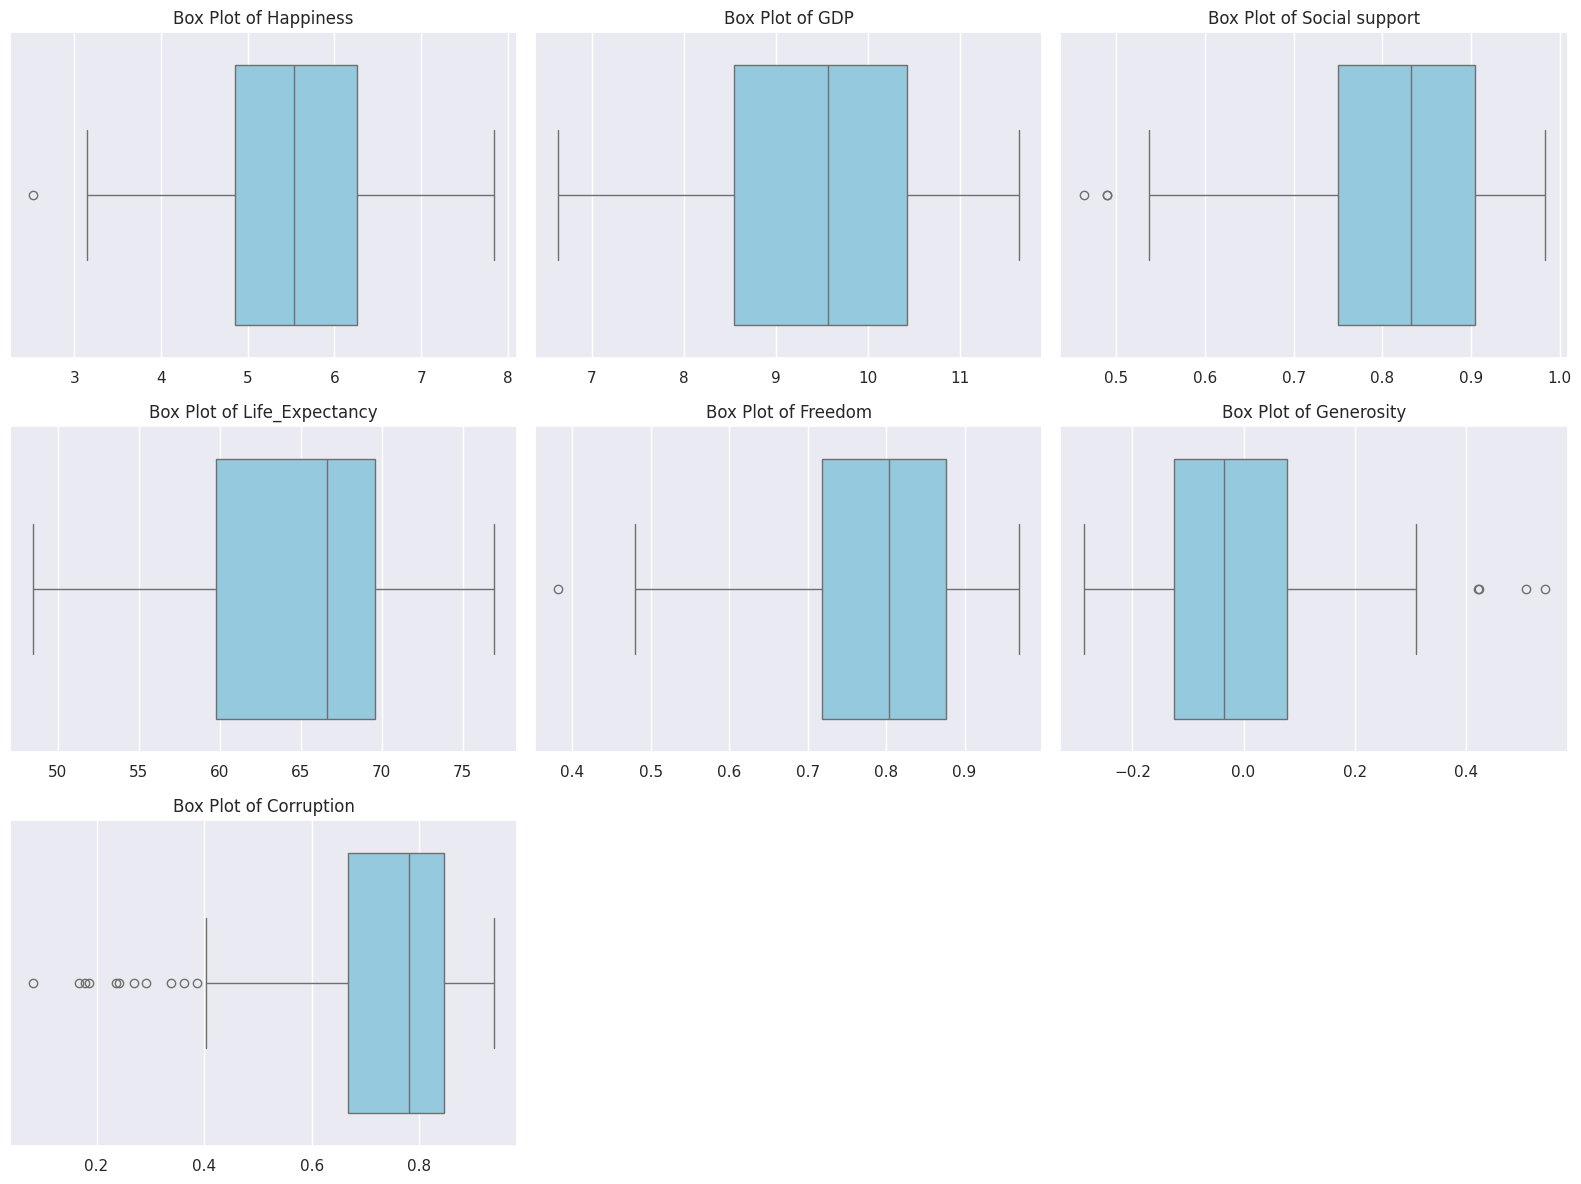

In [33]:
num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')

for j in range(i+1,len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [43]:
region_counts = df['Region'].value_counts()
region_counts


,count
Region,
Sub-Saharan Africa,36
Western Europe,21
Latin America and Caribbean,20
Central and Eastern Europe,17
Middle East and North Africa,17
Commonwealth of Independent States,12
Southeast Asia,9
South Asia,7
East Asia,6


/tmp/ipython-input-4101642004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette='coolwarm')


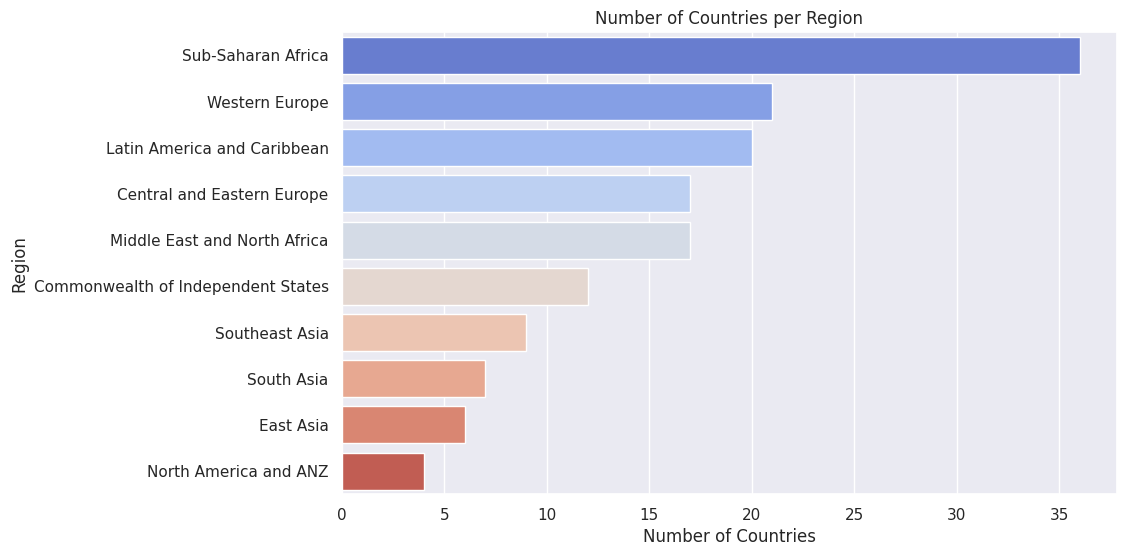

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values, y=region_counts.index, palette='coolwarm')

plt.title("Number of Countries per Region")
plt.xlabel("Number of Countries")
plt.ylabel("Region")
plt.show()


# Bivariate Analysis

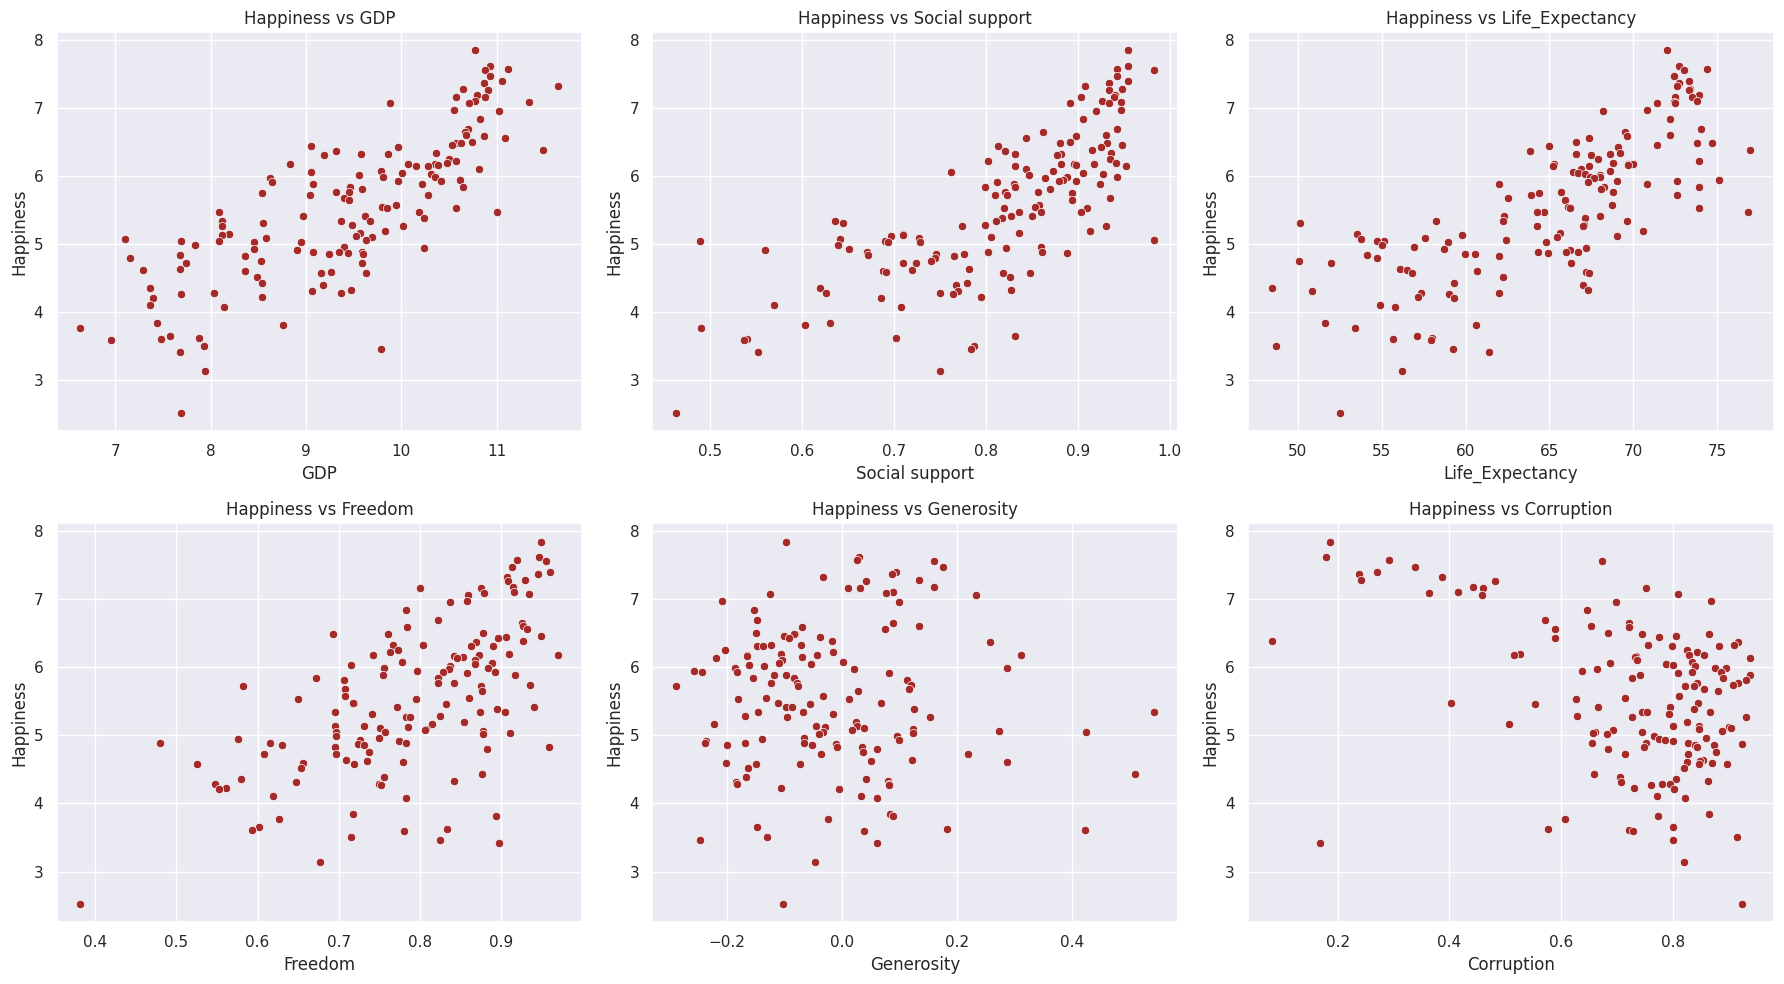

In [48]:
features = ['GDP', 'Social support', 'Life_Expectancy','Freedom', 'Generosity', 'Corruption']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['Happiness'], ax=axes[i], color='brown')
    axes[i].set_title(f'Happiness vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Happiness')


plt.tight_layout()
plt.show()

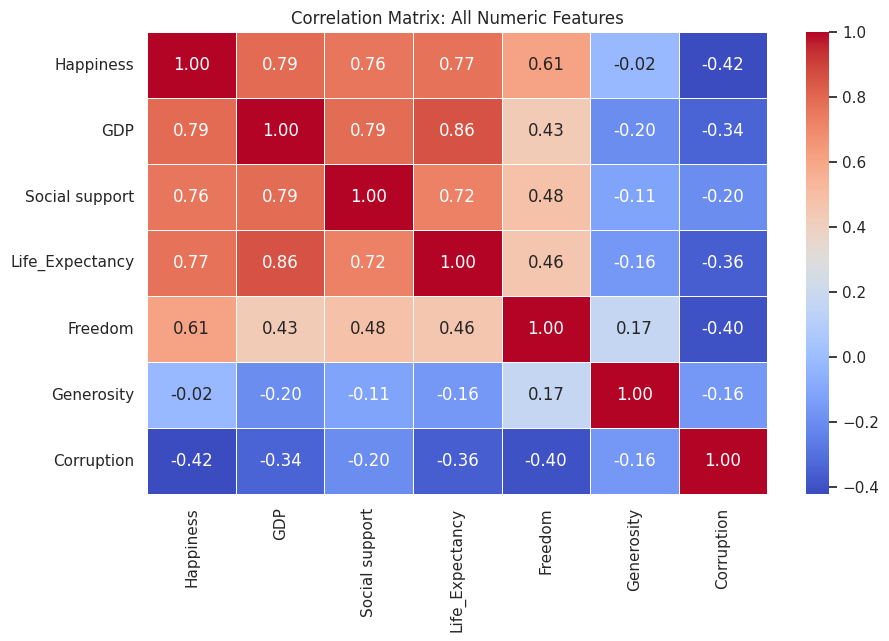

In [52]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: All Numeric Features")
plt.show()


In [53]:
happiness_corr = corr_matrix['Happiness'].drop('Happiness').sort_values(ascending=False)
happiness_corr

,Happiness
GDP,0.789760
Life_Expectancy,0.768099
Social support,0.756888
Freedom,0.607753
Generosity,-0.017799
Corruption,-0.421140


/tmp/ipython-input-2261963540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=happiness_corr.values, y=happiness_corr.index, palette='crest')


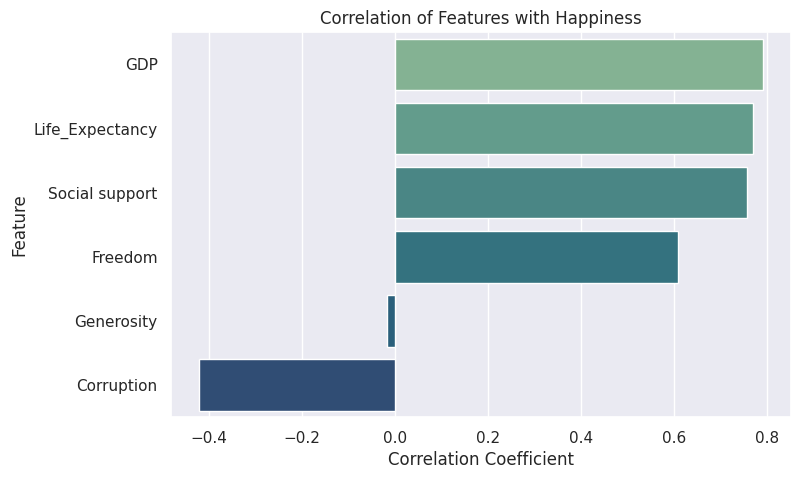

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x=happiness_corr.values, y=happiness_corr.index, palette='crest')
plt.title("Correlation of Features with Happiness")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


# Regional & Country-Level Comparisons


In [55]:
region_avg = df.groupby('Region')['Happiness'].mean().sort_values(ascending=False)
region_avg

,Happiness
Region,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


/tmp/ipython-input-1701868682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')


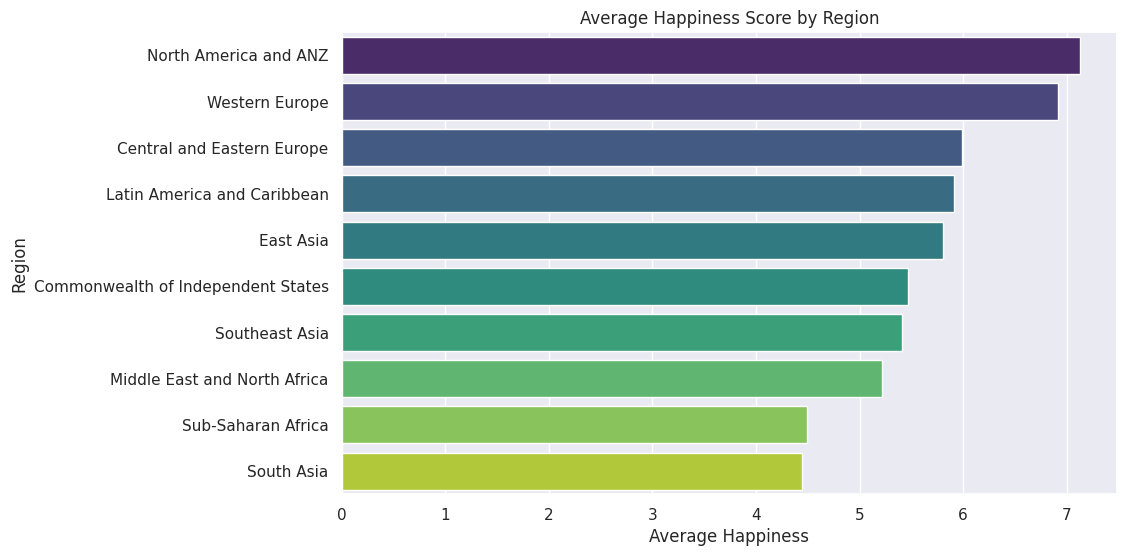

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')
plt.title("Average Happiness Score by Region")
plt.xlabel("Average Happiness")
plt.ylabel("Region")
plt.show()

/tmp/ipython-input-4218288409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Happiness', palette='coolwarm')


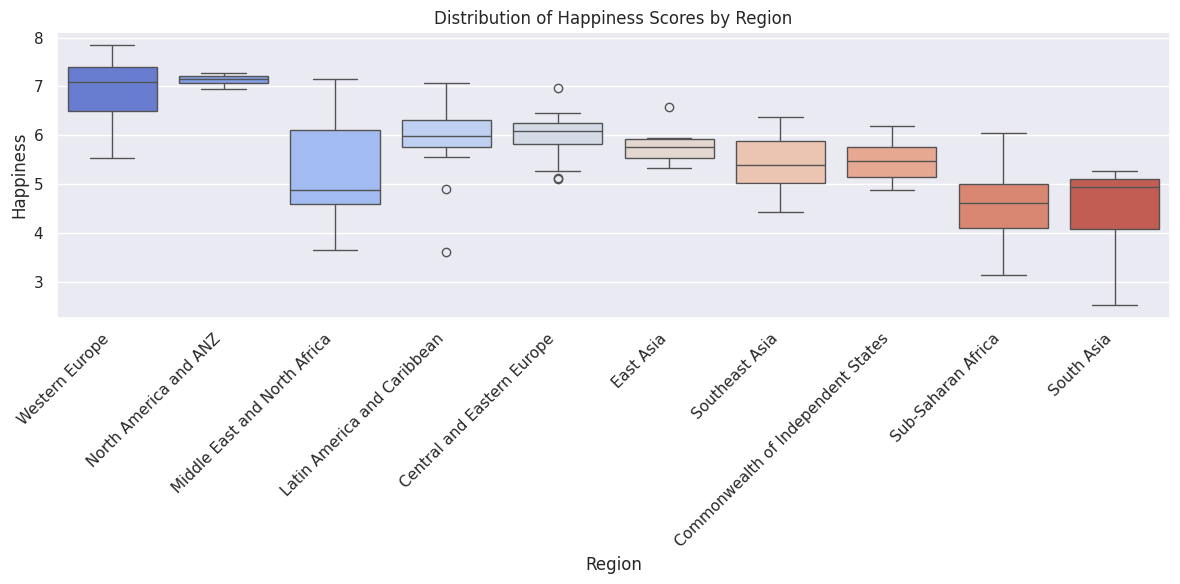

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='Happiness', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Happiness Scores by Region")
plt.ylabel("Happiness")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2186648062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


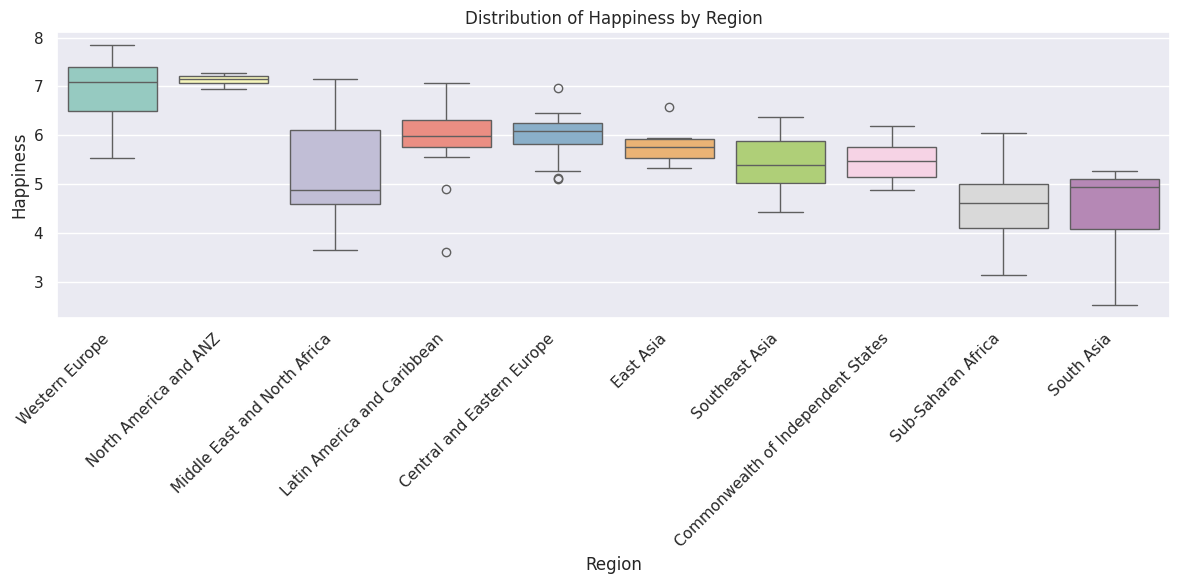

/tmp/ipython-input-2186648062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


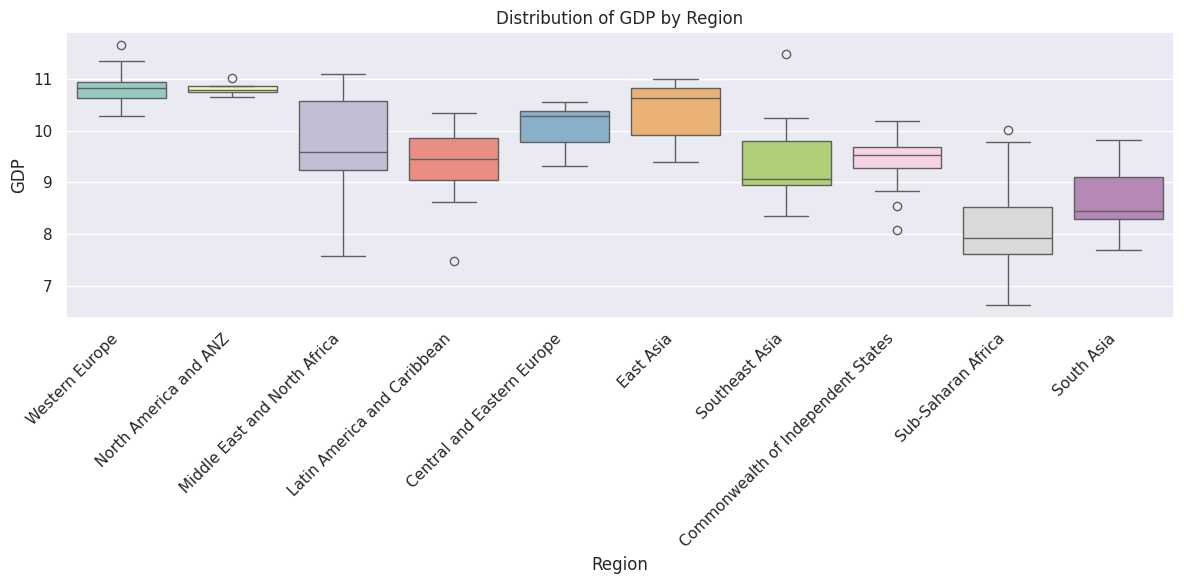

/tmp/ipython-input-2186648062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


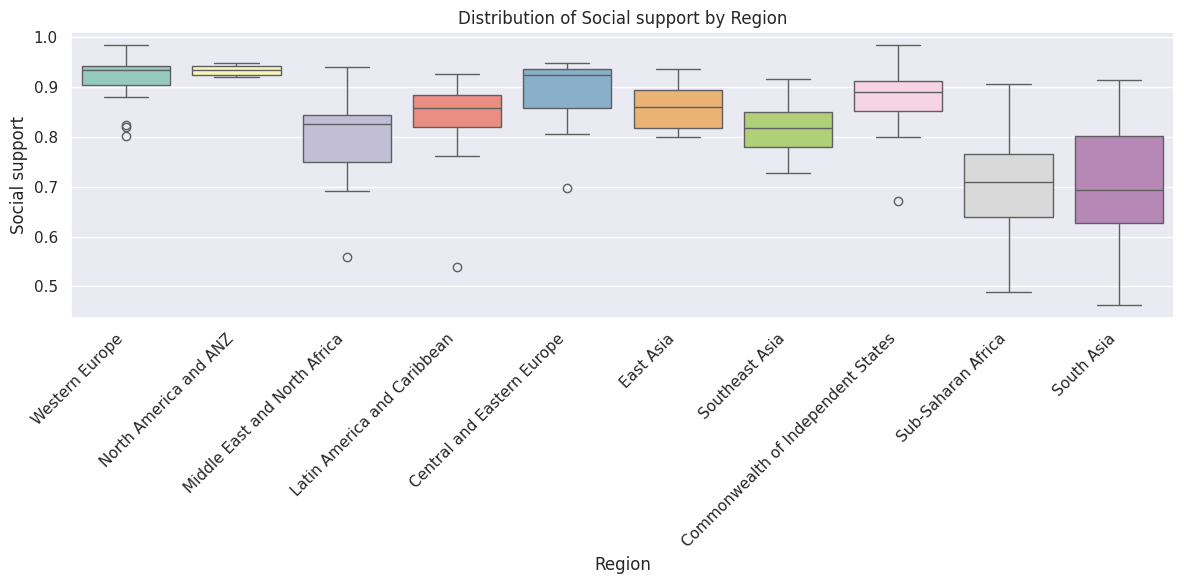

/tmp/ipython-input-2186648062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


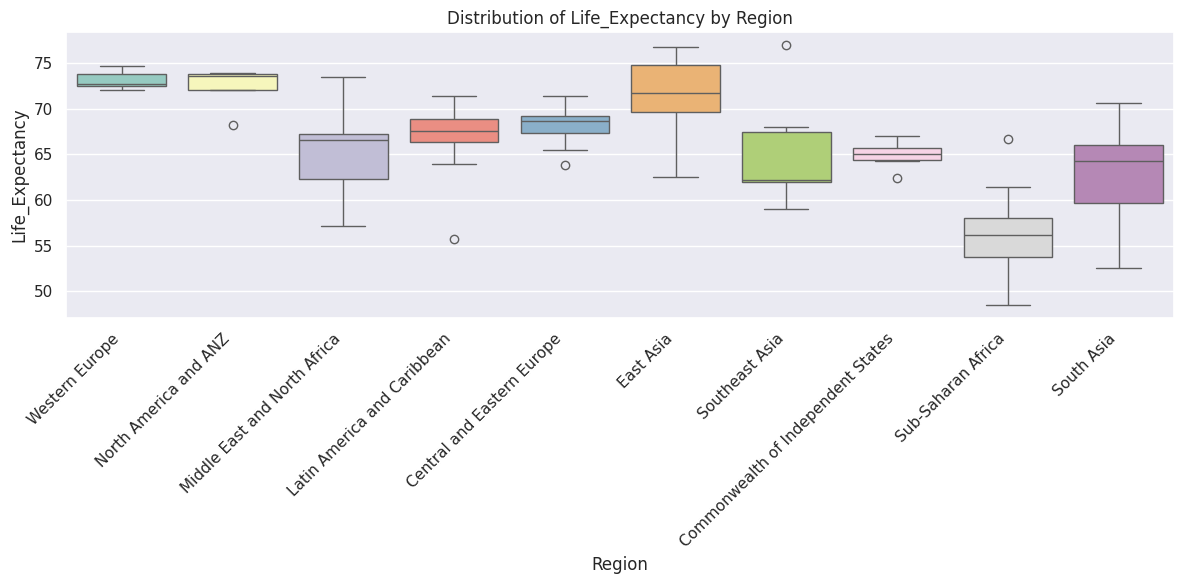

/tmp/ipython-input-2186648062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


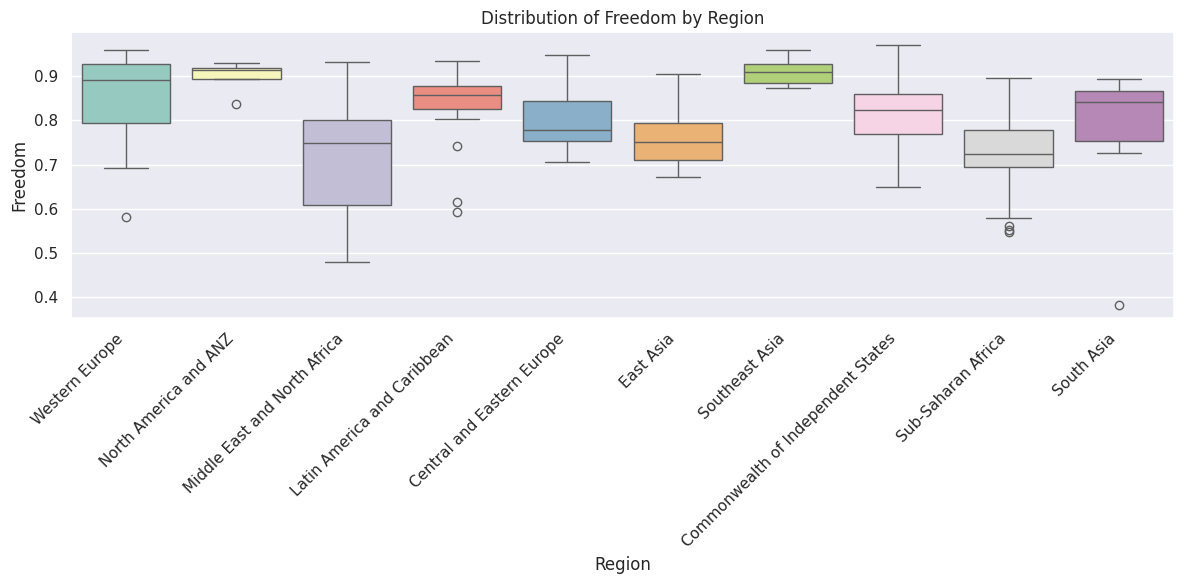

/tmp/ipython-input-2186648062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


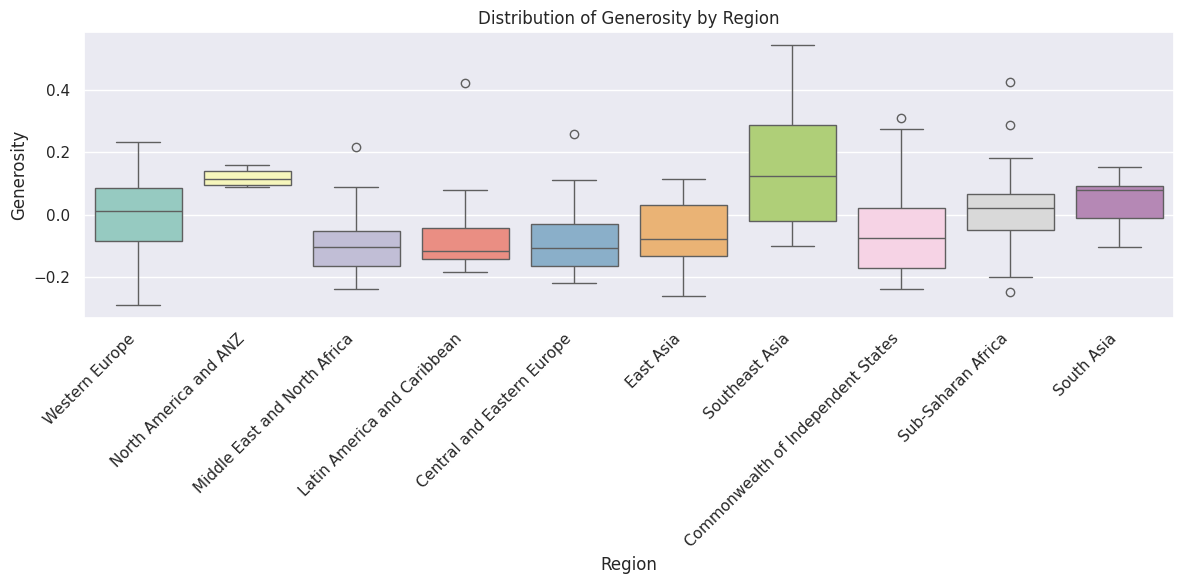

/tmp/ipython-input-2186648062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y=col, palette='Set3')


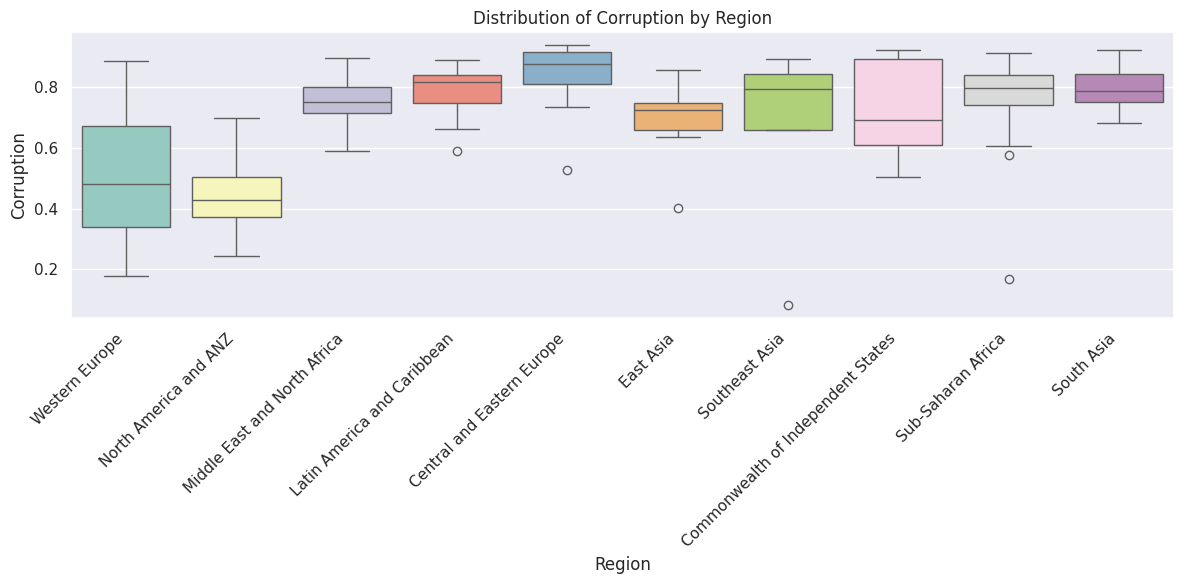

In [62]:
features_to_plot = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy','Freedom', 'Generosity', 'Corruption']
for col in features_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Region', y=col, palette='Set3')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Distribution of {col} by Region")
    plt.xlabel("Region")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-135340797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
/tmp/ipython-input-135340797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
/tmp/ipython-input-135340797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
/tmp/ipython-input-135340797.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

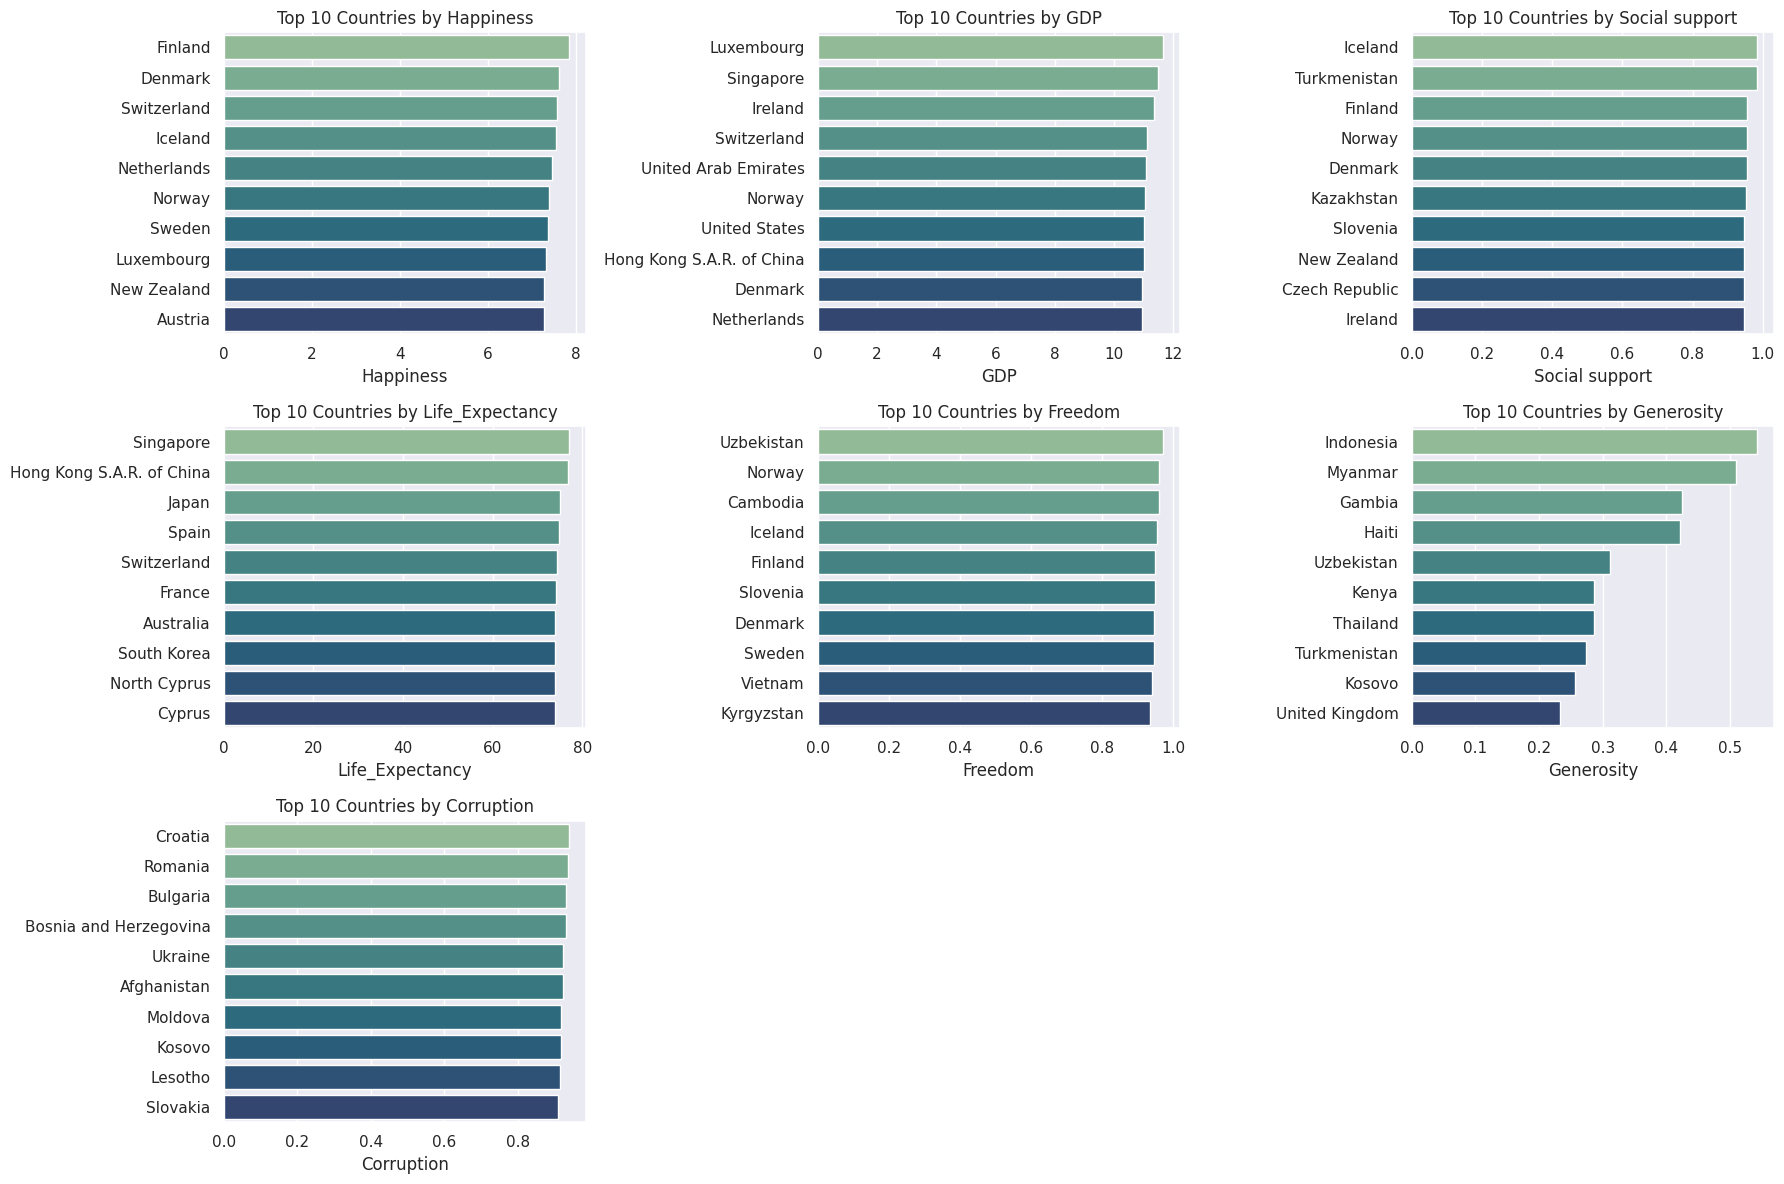

In [63]:
features = ['Happiness', 'GDP', 'Social support', 'Life_Expectancy','Freedom', 'Generosity', 'Corruption']
n_cols = 3
n_rows = math.ceil(len(features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    top10 = df[['Country', col]].sort_values(by=col, ascending=False).head(10)
    sns.barplot(x=col, y='Country', data=top10, ax=axes[i], palette='crest')
    axes[i].set_title(f"Top 10 Countries by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    plt.delaxes(axes[j])

plt.tight_layout()
plt.show()


/tmp/ipython-input-1028659098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
/tmp/ipython-input-1028659098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
/tmp/ipython-input-1028659098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
/tmp/ipython-input-1028659098.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

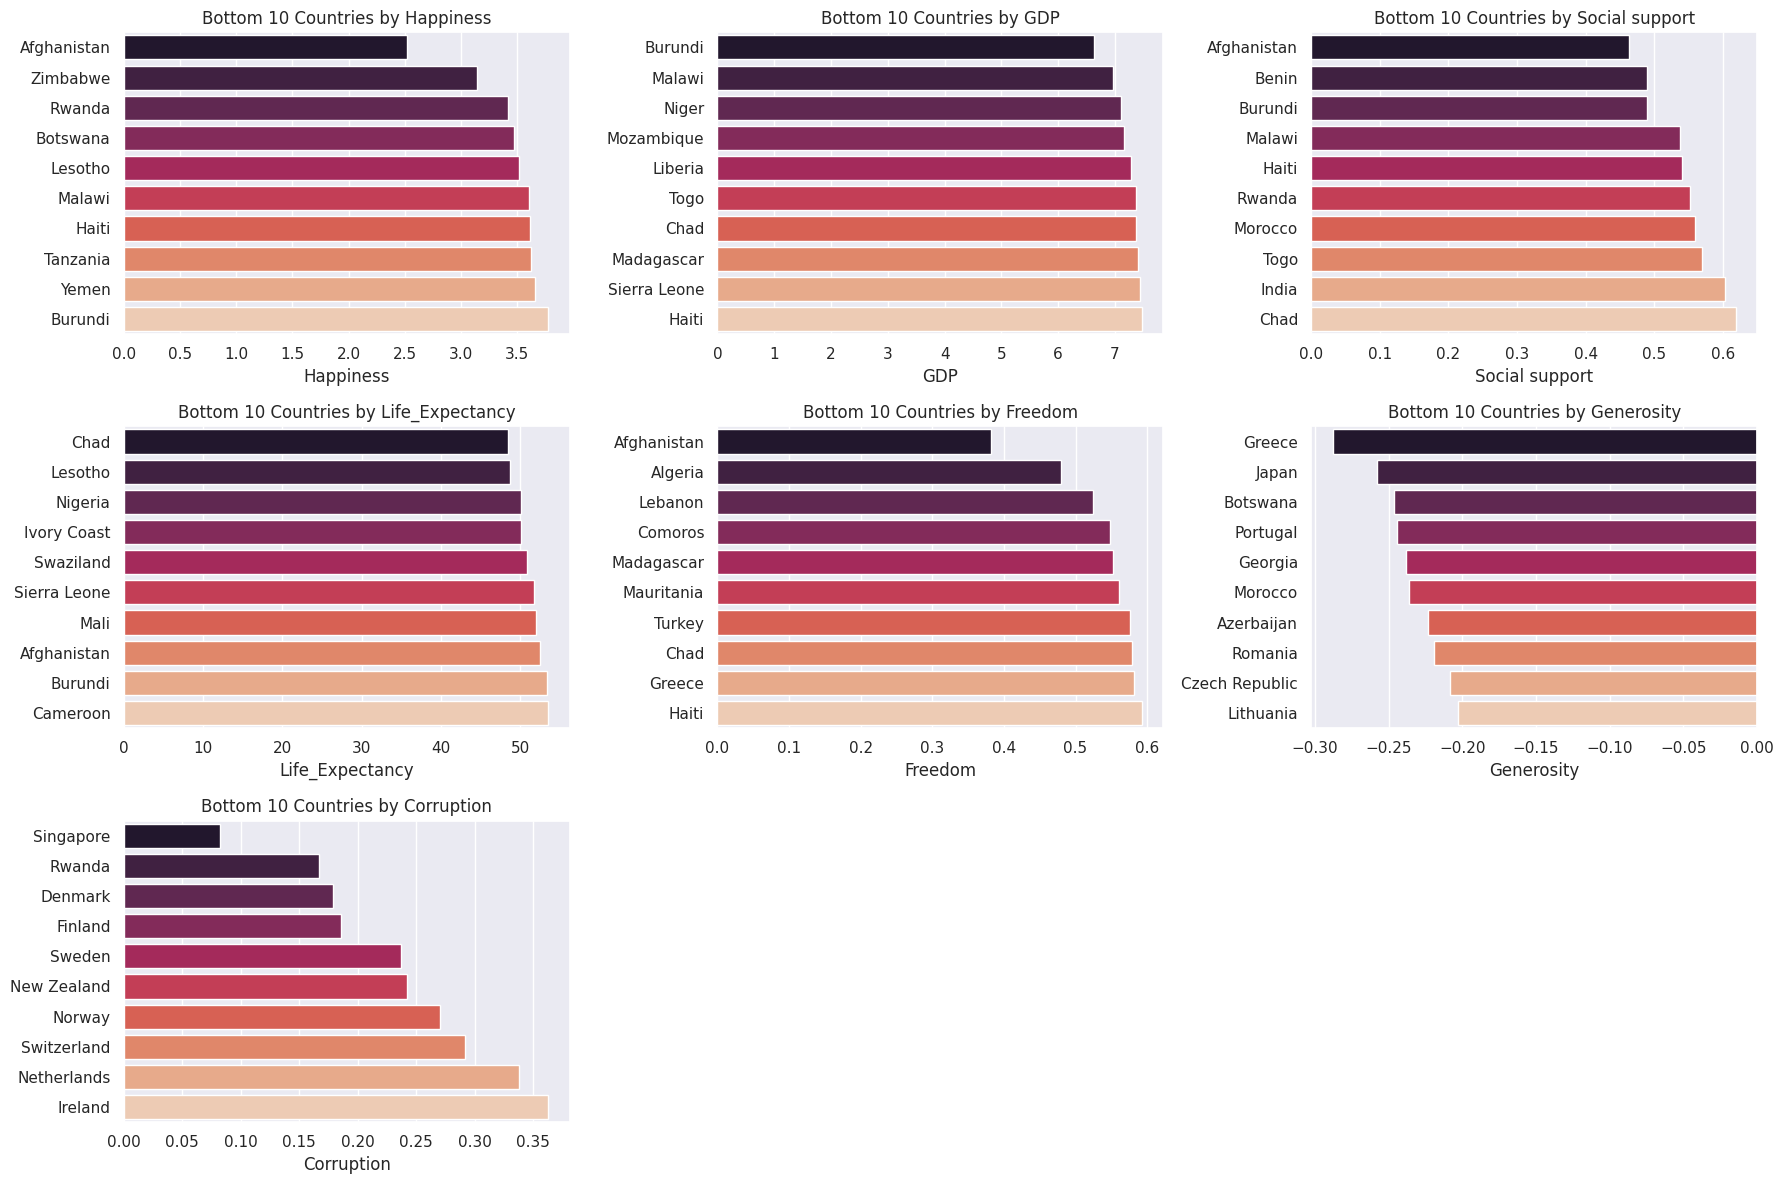

In [64]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    bottom10 = df[['Country', col]].sort_values(by=col, ascending=True).head(10)
    sns.barplot(x=col, y='Country', data=bottom10, ax=axes[i], palette='rocket')
    axes[i].set_title(f"Bottom 10 Countries by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    plt.delaxes(axes[j])

plt.tight_layout()
plt.show()
